# **臺灣各大學資料分析**


---

Data analysis of Taiwan universities.

# 0. 背景與目的

這份作業會對臺灣各大學的現象提出三個問題，並將資料視覺化，解決及統整出三個問題的回答。

---
This assignment will ask three questions about the phenomenon of various universities in Taiwan, and visualize the data to solve and integrate the answers to the three questions.


In [ ]:
import numpy as np
import pandas as pd
import csv
import matplotlib
import seaborn as sns

from google.colab import files
data = files.upload()

data = pd.read_csv('q22education.csv')
data.head()

Saving q22education.csv to q22education (1).csv


,QS ranking order,University name,University,University.1,Number of full-time teachers,Government funding,Number of patent announcements in the Republic of China,Student paper publishing and presentation activities,Number of interns during the semester,Library Chinese Collection,Library English Collection,Borrowers
0,1,國立臺灣大學,NTU,National Taiwan University,"2,064","8,508,404,641",66,1152,787,1687684,"1,869,041","87,610"
1,2,國立清華大學,NTHU,National Tsing Hua University,859,"3,640,819,608",106,541,84,"953,264","451,741","82,417"
2,3,國立成功大學,NCKU,National Cheng Kung University,"1,328","5,052,973,087",95,782,965,"825,727","596,172","39,159"
3,4,國立陽明交通大學,NYCU,National Yang-Ming Chiao Tung University,"1,156","4,520,551,951",95,496,406,"686,475","445,660","37,350"
4,5,國立臺灣科技大學,NTUST,National Taiwan University of Science and Tech...,522,"1,314,267,463",51,43,171,"297,212","96,642","48,896"


# 1. 在臺灣，各大學的學術排名是否受到政府資金投入的影響？



我想知道在臺灣的大學中，是否存在一個趨勢 : **較高的研究資金投入對學術排名會有積極的影響？**因此找了政府公開平台上110年政府投入在各大學的資金，以及臺灣各大學在QS上的排名。


1. 各大學在QS排名上的折線圖



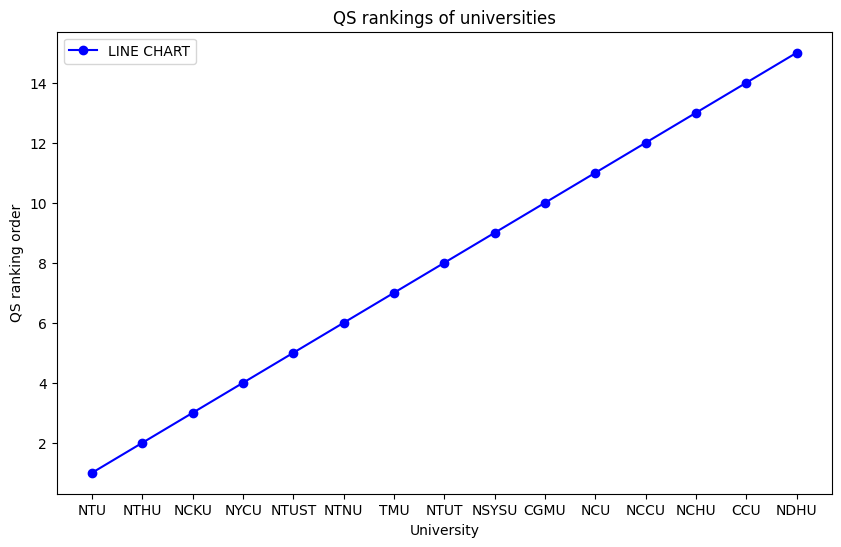

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 从CSV文件中导入数据
data = pd.read_csv('q22education.csv')  # 替换为您的数据文件路径


# 提取X轴和Y轴数据
x = data['University']
y = data['QS ranking order']

# 设置图的大小
plt.figure(figsize=(10, 6))  # 设置宽度和高度，单位是英寸

# 绘制折线图
plt.plot(x, y, marker='o', linestyle='-', color='b', label='LINE CHART')


# 设置图形属性
plt.title('QS rankings of universities')
plt.xlabel('University')
plt.ylabel('QS ranking order')

# 添加图例
plt.legend()

# 显示图形
plt.show()



2. 110年政府投入資金，及大學QS排名的關係。


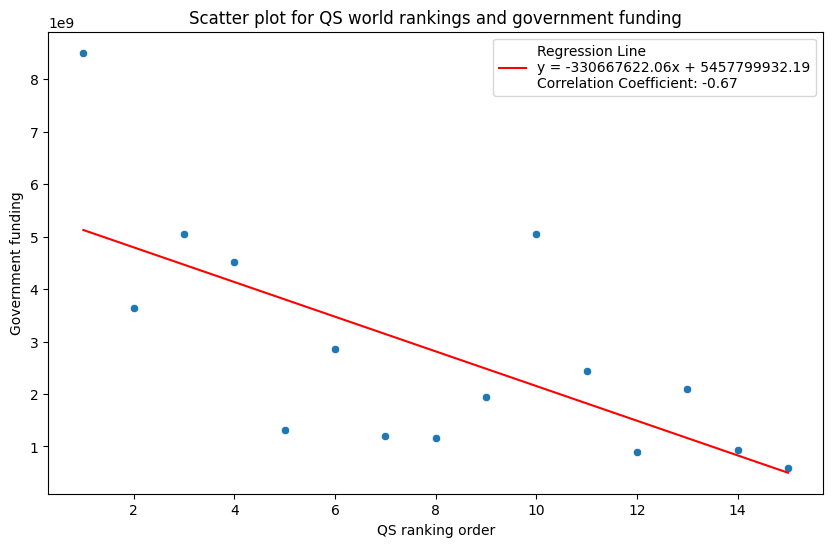

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# 加载数据
data = pd.read_csv('q22education.csv')

# 去除逗号并转换为浮点数
data['Government funding'] = data['Government funding'].str.replace(',', '').astype(float)

# 设置图的大小
plt.figure(figsize=(10, 6))  # 设置宽度和高度，单位是英寸

sns.scatterplot(x='QS ranking order', y='Government funding', data=data)

# 使用线性回归拟合数据
slope, intercept, r_value, p_value, std_err = stats.linregress(data['QS ranking order'], data['Government funding'])

# 绘制回归直线
plt.plot(data['QS ranking order'], intercept + slope * data['QS ranking order'], color='red', label=f'Regression Line\ny = {slope:.2f}x + {intercept:.2f}\nCorrelation Coefficient: {r_value:.2f}')

plt.title('Scatter plot for QS world rankings and government funding')
plt.xlabel('QS ranking order')
plt.ylabel('Government funding')

plt.legend()
plt.show()


從上圖中，我們可以發現政府投入資金與臺灣各大學在QS上的排名，是呈現負相關。因此我們可以做出最終結論 :

# <font color='red'>據分析臺灣的大學中存在一個趨勢 : 較高的研究資金投入與較前面的學術排名有關。</font>



---



# 2. 在臺灣，各大學的學術資源是否對學生的學術研究有影響？

我想知道在臺灣的大學中，是否有證據表明，**學生在校內圖書館的利用程度與其學術成績之間存在相關性？**

因此找了政府公開平台上110年的資料，以各大學圖書館藏書量、各大學專任教師數作為學術資源的依據。而該學年學生發表論文及展演數、該學年申請中華民國專利數量啜為學術研究的依據，做相關程度的分析。


1. 各大學圖書館藏書量及學期借閱人數長條圖


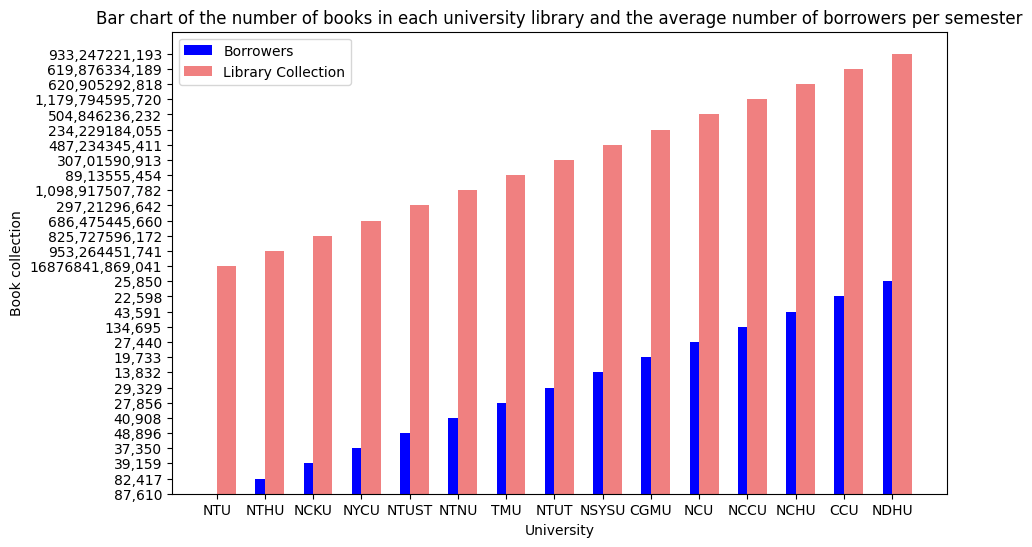

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 加载数据
data = pd.read_csv('q22education.csv')  # 替换为您的数据文件路径
data['Library Collection'] = data['Library Chinese Collection']+data['Library English Collection']


# 从数据中提取需要的列
categories = data['University']
values2 = data['Library Collection']
values1 = data['Borrowers']


# 设置图的大小
plt.figure(figsize=(10, 6))

# 绘制第一个长条图
plt.bar(categories, values1, width=0.4, label='Borrowers', align='center', color='blue')

# 绘制第二个长条图，通过调整横坐标的位置来叠加在第一个图之上
plt.bar([x for x in categories], values2, width=0.4, label='Library Collection', align='edge', color='lightcoral')


# 设置图例
plt.legend()

# 设置标题和标签
plt.title('Bar chart of the number of books in each university library and the average number of borrowers per semester')
plt.xlabel('University')
plt.ylabel('Book collection')

# 显示图形
plt.show()


2. 110年各大學圖書館藏書量及該學年學生發表論文及展演數的關係



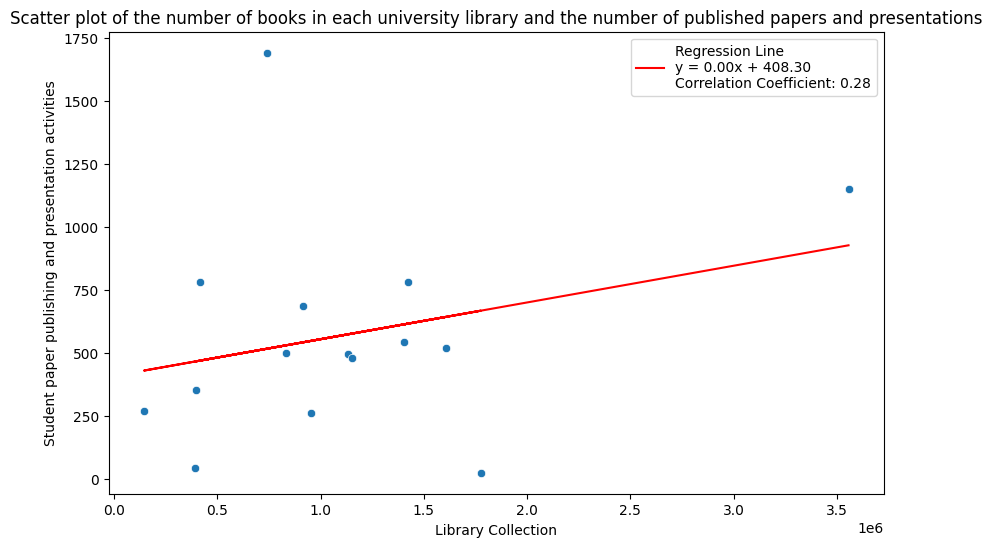

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# 加载数据
data = pd.read_csv('q22education.csv')

# 去除逗号并转换为浮点数
data['Library Chinese Collection'] = data['Library Chinese Collection'].str.replace(',', '').astype(float)
data['Library English Collection'] = data['Library English Collection'].str.replace(',', '').astype(float)
data['Library Collection'] = data['Library Chinese Collection']+data['Library English Collection']

# 设置图的大小
plt.figure(figsize=(10, 6))  # 设置宽度和高度，单位是英寸

sns.scatterplot(x='Library Collection', y='Student paper publishing and presentation activities', data=data)

# 使用线性回归拟合数据
slope, intercept, r_value, p_value, std_err = stats.linregress(data['Library Collection'], data['Student paper publishing and presentation activities'])

# 绘制回归直线
plt.plot(data['Library Collection'], intercept + slope * data['Library Collection'], color='red', label=f'Regression Line\ny = {slope:.2f}x + {intercept:.2f}\nCorrelation Coefficient: {r_value:.2f}')

plt.title('Scatter diagram of the number of books in each university library and the number of papers and performances published by students in the academic year in 110 years')
plt.xlabel('Library Collection')
plt.ylabel('Student paper publishing and presentation activities')

plt.legend()
plt.show()


3. 110年各大學專任教師數及該學年學生發表論文及展演數的關係


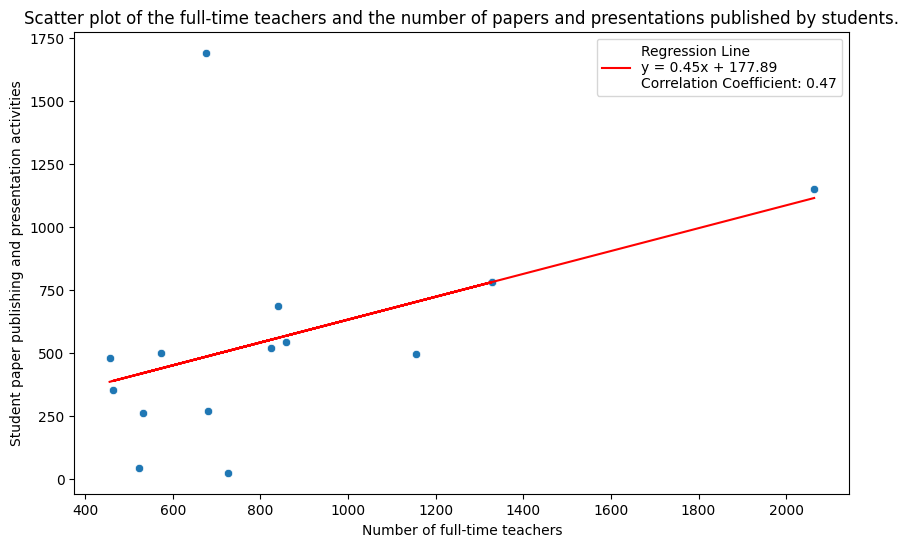

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# 加载数据
data = pd.read_csv('q22education.csv')

# 去除逗号并转换为浮点数
data['Number of full-time teachers'] = data['Number of full-time teachers'].str.replace(',', '').astype(float)

# 设置图的大小
plt.figure(figsize=(10, 6))  # 设置宽度和高度，单位是英寸

sns.scatterplot(x='Number of full-time teachers', y='Student paper publishing and presentation activities', data=data)

# 使用线性回归拟合数据
slope, intercept, r_value, p_value, std_err = stats.linregress(data['Number of full-time teachers'], data['Student paper publishing and presentation activities'])

# 绘制回归直线
plt.plot(data['Number of full-time teachers'], intercept + slope * data['Number of full-time teachers'], color='red', label=f'Regression Line\ny = {slope:.2f}x + {intercept:.2f}\nCorrelation Coefficient: {r_value:.2f}')

plt.title('Scatter plot of the full-time teachers and the number of papers and presentations published by students.')
plt.xlabel('Number of full-time teachers')
plt.ylabel('Student paper publishing and presentation activities')

plt.legend()
plt.show()


4. 110年各大學圖書館藏書量及該學年申請中華民國專利的關係



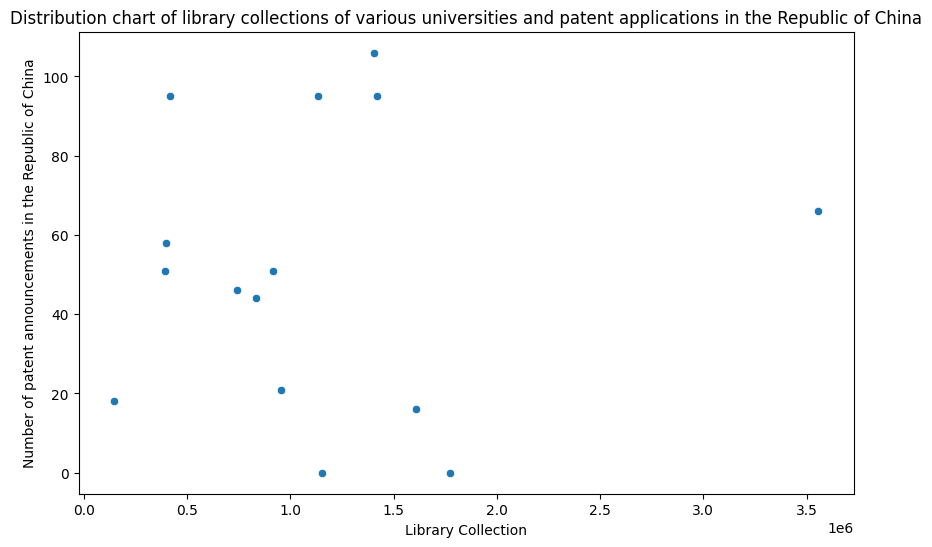

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# 加载数据
data = pd.read_csv('q22education.csv')

# 去除逗号并转换为浮点数
data['Library Chinese Collection'] = data['Library Chinese Collection'].str.replace(',', '').astype(float)
data['Library English Collection'] = data['Library English Collection'].str.replace(',', '').astype(float)
data['Library Collection'] = data['Library Chinese Collection']+data['Library English Collection']

# 设置图的大小
plt.figure(figsize=(10, 6))  # 设置宽度和高度，单位是英寸

sns.scatterplot(x='Library Collection', y='Number of patent announcements in the Republic of China', data=data)

plt.title('Distribution chart of library collections of various universities and patent applications in the Republic of China')
plt.xlabel('Library Collection')
plt.ylabel('Number of patent announcements in the Republic of China')


plt.show()


5. 110年各大學專任教師數及該學年申請中華民國專利的關係



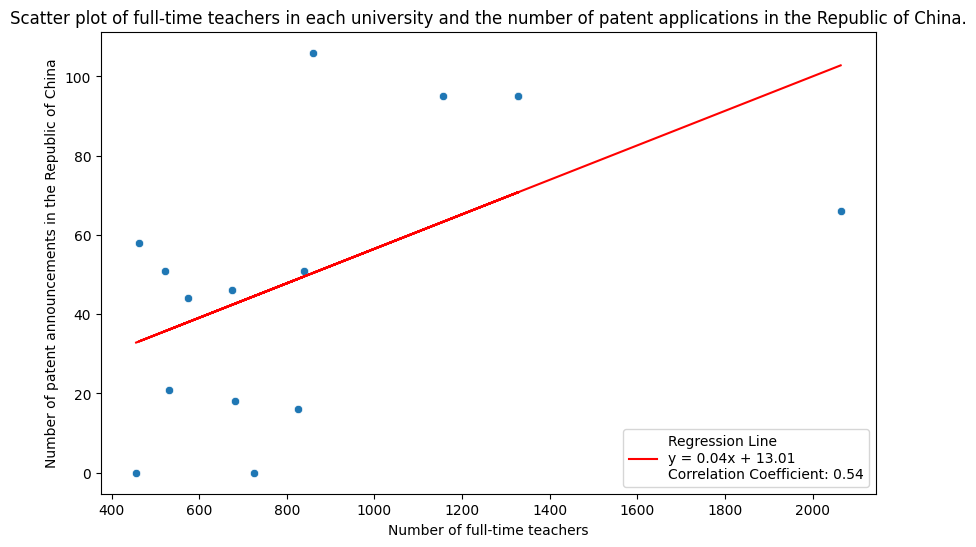

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# 加载数据
data = pd.read_csv('q22education.csv')

# 去除逗号并转换为浮点数
data['Number of full-time teachers'] = data['Number of full-time teachers'].str.replace(',', '').astype(float)

# 设置图的大小
plt.figure(figsize=(10, 6))  # 设置宽度和高度，单位是英寸

sns.scatterplot(x='Number of full-time teachers', y='Number of patent announcements in the Republic of China', data=data)

# 使用线性回归拟合数据
slope, intercept, r_value, p_value, std_err = stats.linregress(data['Number of full-time teachers'], data['Number of patent announcements in the Republic of China'])

# 绘制回归直线
plt.plot(data['Number of full-time teachers'], intercept + slope * data['Number of full-time teachers'], color='red', label=f'Regression Line\ny = {slope:.2f}x + {intercept:.2f}\nCorrelation Coefficient: {r_value:.2f}')

plt.title('Scatter plot of full-time teachers in each university and the number of patent applications in the Republic of China.')
plt.xlabel('Number of full-time teachers')
plt.ylabel('Number of patent announcements in the Republic of China')

plt.legend()
plt.show()


從上面的四個散佈圖中，我們可以發現 :
1. 各大學藏書量與學生發表論文及展演數呈正相關。
2. 各大學專任教師數與學生發表論文及展演數呈正相關。
3. 各大學藏書量與該學年申請中華民國專利數量呈零相關。
4. 各大學專任教師數與該學年申請中華民國專利數量呈正相關。

# <font color='red'>據分析，臺灣的大學中有證據表明 : 校內的學術資源(各大學專任教師數)與學生的學術研究(學生發表論文及展演，申請中華民國專利)有關。</font>

# <font color='red'>而關於學術資源(各大學藏書量)對於學生的學術研究(學生發表論文及展演)則沒有關係。</font>
---



# 3. 在臺灣，各大學的畢業生就業率是否受到實習機會的影響？

我想知道在臺灣的大學中是否存在一種模式，**即參與實習的學生更有可能獲得高於平均水平的就業率？**因此找了政府公開平台上110年各大學學生每學期實習的平均人數及110年企業統計最喜歡錄取的大學排行榜。



1. 110年企業最愛錄取大學排行及該大學每學期實習人數的關係




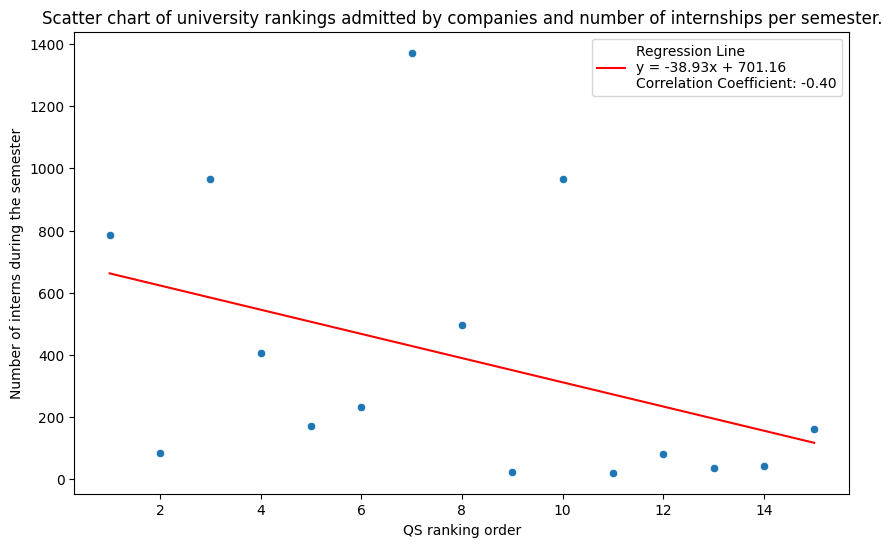

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# 加载数据
data = pd.read_csv('q22education.csv')

# 设置图的大小
plt.figure(figsize=(10, 6))  # 设置宽度和高度，单位是英寸

sns.scatterplot(x='QS ranking order', y='Number of interns during the semester', data=data)

# 使用线性回归拟合数据
slope, intercept, r_value, p_value, std_err = stats.linregress(data['QS ranking order'], data['Number of interns during the semester'])

# 绘制回归直线
plt.plot(data['QS ranking order'], intercept + slope * data['QS ranking order'], color='red', label=f'Regression Line\ny = {slope:.2f}x + {intercept:.2f}\nCorrelation Coefficient: {r_value:.2f}')

plt.title('Scatter chart of university rankings admitted by companies and number of internships per semester.')
plt.xlabel('QS ranking order')
plt.ylabel('Number of interns during the semester')

plt.legend()
plt.show()


從上圖中，我們可以發現各大學每學期的實習人數與臺灣各大學在企業喜愛錄取的排名中呈現負相關。因此我們可以做出最終結論 :

# <font color='red'>據分析，臺灣的大學中存在一種模式 : 參與實習學生越多的大學與企業喜愛度有關。</font>



---

